# Individual Neuron Development

In [20]:
import sys
sys.path.insert(0, '/Users/amilmerchant/NEST/install/lib/python2.7/site-packages')
import nest
import pylab
import math

In [21]:
nest.ResetKernel()
nest.SetKernelStatus({"local_num_threads": 4})
nest.SetKernelStatus({"resolution": 0.2})

In [22]:
e_dict = {'V_m': -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 500.,
          'g_L': 25.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.2, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 2.
         }

In [23]:
i_dict = {'V_m' : -55.,
          'V_th': -50.,
          'V_peak': 0.,
          'V_reset': -55.,
          'C_m': 200.,
          'g_L': 20.,
          'E_L':-70.,
          'E_rev': [0., -70., 0.],
          'tau_rise' : [0.2, 0.2, 2.],
          'tau_decay' : [2., 5., 100.],
          'a' : 0.,
          'b' : 0.,
          'Delta_T' : 0.,
          'tau_w' : 1000.,
          't_ref' : 1.
         }

In [24]:
N_e = 1600
N_i = 400

Cxe = nest.Create("aeif_cond_beta_multisynapse", N_e, e_dict)
Cxi = nest.Create("aeif_cond_beta_multisynapse", N_i, i_dict)


Cxe_L = Cxe[:240]
Cxe_R = Cxe[240:480]
Cxe_non = Cxe[480:]

Cxe_AND = nest.Create("aeif_cond_beta_multisynapse", 20, e_dict)
Cxe_ALL = nest.Create("aeif_cond_beta_multisynapse", 240, e_dict)


## Synapses

In [25]:
nest.CopyModel("static_synapse", "eAMPA", 
               {"weight": 1.0, 'receptor_type': 1,  'delay' : 0.2})
nest.CopyModel("static_synapse", "eGABA", 
               {"weight": 1.0, 'receptor_type': 2, 'delay': 0.2})
nest.CopyModel("ht_synapse", "eNMDA", 
               {"weight": 1.0, 'receptor_type': 3, 'delay': 0.2})

In [26]:
nest.SetDefaults("eNMDA", {"tau_P": 100.})

In [27]:
cor_back = nest.Create('poisson_generator', 1, {'rate': 1600.})

parrot_cxe = nest.Create('parrot_neuron', 1600)
parrot_cxi = nest.Create('parrot_neuron', 400)
parrot_cxe_all = nest.Create('parrot_neuron', 240)
parrot_cxe_and = nest.Create('parrot_neuron', 20)

conn_dict = {'rule': 'all_to_all'}
some_dict = {'rule': 'pairwise_bournoullip'}

nest.Connect(cor_back, parrot_cxe, conn_dict, {'model': 'static_synapse'})
nest.Connect(cor_back, parrot_cxi, conn_dict, {'model': 'static_synapse'})
nest.Connect(cor_back, parrot_cxe_all, conn_dict, {'model': 'static_synapse'})
nest.Connect(cor_back, parrot_cxe_and, conn_dict, {'model': 'static_synapse'})

In [28]:
correction = (1 + 1 * math.exp(-0.062 * -55) / 3.57)

w_plus = 1.7
f = float(len(Cxe_L)) /len(Cxe)
w_minus = 1 - f * (w_plus - 1) / (1 - f)

In [29]:
nest.Connect(parrot_cxe, Cxe, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 2.1})
nest.Connect(parrot_cxe_all, Cxe_ALL, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 2.1})
nest.Connect(parrot_cxe_and, Cxe_AND, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 2.1})
nest.Connect(parrot_cxi, Cxi, {'rule': 'one_to_one'}, {'model': 'eAMPA', 'weight': 1.62 })


### Internal Connections

In [30]:
nest.Connect(Cxe_L, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.085})
nest.Connect(Cxe_R, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.085})

nest.Connect(Cxe_L, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction })
nest.Connect(Cxe_R, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction})

nest.Connect(Cxe, Cxi, conn_dict, {'model': 'eAMPA', 'weight': 0.045 })
nest.Connect(Cxe, Cxi, conn_dict, {'model': 'eNMDA', 'weight': 0.13 / correction })

nest.Connect(Cxi, Cxe, conn_dict, {'model': 'eGABA', 'weight': 1.3 })
nest.Connect(Cxi, Cxi, conn_dict, {'model': 'eGABA', 'weight': 1.0 })

nest.Connect(Cxe_L, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_R, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})

nest.Connect(Cxe_L, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })
nest.Connect(Cxe_R, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })

# *******************************
nest.Connect(Cxe_AND, Cxe_AND, conn_dict, {'model': 'eAMPA', 'weight': 0.085})
nest.Connect(Cxe_ALL, Cxe_ALL, conn_dict, {'model': 'eAMPA', 'weight': 0.085})

nest.Connect(Cxe_AND, Cxe_AND, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction})
nest.Connect(Cxe_ALL, Cxe_ALL, conn_dict, {'model': 'eNMDA', 'weight': 0.2805 / correction})

nest.Connect(Cxi, Cxe_ALL, conn_dict, {'model': 'eGABA', 'weight': 1.3 })
nest.Connect(Cxi, Cxe_AND, conn_dict, {'model': 'eGABA', 'weight': 1.3 })

nest.Connect(Cxe_AND, Cxe_ALL, conn_dict, {'model': 'eAMPA', 'weight': 0.05 })
nest.Connect(Cxe_AND, Cxe_ALL, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(Cxe_L, Cxe_ALL, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(Cxe_L, Cxe_ALL, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })
nest.Connect(Cxe_R, Cxe_ALL, conn_dict, {'model': 'eAMPA', 'weight': 0.05 })
nest.Connect(Cxe_R, Cxe_ALL, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })
# *******************************

nest.Connect(Cxe_L, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(Cxe_L, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })
nest.Connect(Cxe_R, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05 })
nest.Connect(Cxe_R, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165 / correction })

nest.Connect(Cxe_non, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_non, Cxe_L, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })
nest.Connect(Cxe_non, Cxe_R, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_non, Cxe_R, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })
nest.Connect(Cxe_non, Cxe_ALL, conn_dict, {'model': 'eAMPA', 'weight': 0.043825})
nest.Connect(Cxe_non, Cxe_ALL, conn_dict, {'model': 'eNMDA', 'weight': 0.14462 / correction })

nest.Connect(Cxe_non, Cxe_non, conn_dict, {'model': 'eAMPA', 'weight': 0.05})
nest.Connect(Cxe_non, Cxe_non, conn_dict, {'model': 'eNMDA', 'weight': 0.165/ correction })

In [31]:
coherence = 25.6
u_a_factor = 60
u_b_factor = 20

u_a = 20 + u_a_factor * coherence / 100.
u_b = 20 - u_b_factor * coherence / 100.


input_one = nest.Create('poisson_generator', 1, {'rate': u_a, 'start': 200., 'stop' : 300.})
#input_two = nest.Create('poisson_generator', 1, {'rate': u_a, 'start': 500., 'stop' : 525.})

nest.Connect(input_one, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })
#nest.Connect(input_two, Cxe_L, conn_dict, {'model': 'eAMPA', 'weight': 2.1 })

# Run the Model

In [32]:
multis = []
for i in Cxe:
    multimeter = nest.Create("multimeter")
    multis.append(multimeter)
    nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
    nest.Connect(multimeter, [i])

spikedetector = nest.Create("spike_detector",
                params={"withgid": True, "withtime": True})
nest.Connect(Cxe, spikedetector)

In [33]:
import nest.raster_plot

pops = [Cxe_L, Cxe_R, Cxe_ALL, Cxe_AND, Cxe, Cxi]
sds = []
for i in range(len(pops)):
    sds.append(nest.Create("spike_detector",
                params={"withtime": True}))
    nest.Connect(pops[i], sds[i])

In [34]:
import time
start = time.time()
sim_time = 1500.

In [35]:
nest.Simulate(sim_time)
end = time.time()
print end - start

43.7891390324


In [36]:
import pylab
pylab.ion()

names = ["Cxe_L", "Cxe_R", "Cxe_ALL", "Cxe_AND", "Cxe", "Cxi"]

In [37]:
import matplotlib.pyplot as plt

frame = 50 # 50 ms firing rate interval

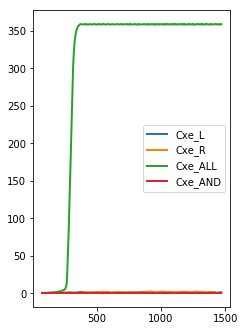

In [38]:
width = 12
height = 12
plt.figure(figsize=(width, height))

offset = 50

plt.subplot(231)
for i in range(0,4):
    times = []
    values = []
    for j in range(offset + frame / 2 , (int) (sim_time - frame / 2), frame / 10):
        times.append(j)
        dsd = nest.GetStatus(sds[i],keys="events")[0]["times"]
        count = sum(1 if x <= j + frame / 2. and x >= j - frame / 2. else 0 for x in dsd)
        values.append(1000. * count / frame / len(pops[i]))
    plt.plot(times, values, lw=2, label= names[i])
plt.legend()